# Algoritmos de optimización - Reto 2

Nombre: Diego Miglino<br>
Github: Github: https://github.com/dmiglino/OptimizationAlgorithms/blob/main/Algoritmos_R2.ipynb<br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

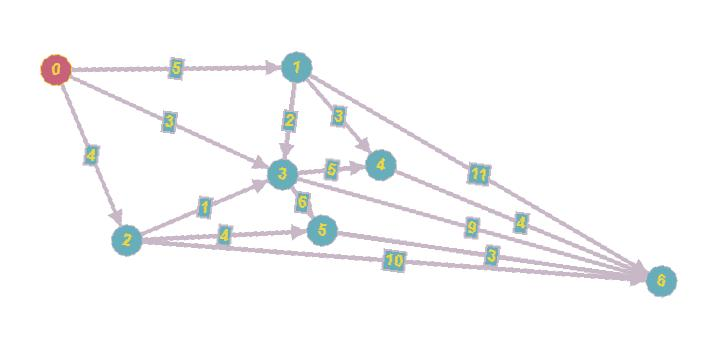

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [1]:
#Viaje por el rio - Programación dinámica
################################################################################

# por su simplicidad, intente primero con un metodo voraz.
# si bien se encuentra una buena solucion, no es la optima.
def metodo_voraz(grafo, nro_embarcadero, viaje):
    
    embarcadero = grafo[nro_embarcadero]
    if(len(embarcadero) == 0):
        return viaje

    mas_corto = (-1, np.inf)
    for camino in embarcadero:
        if camino[1] < mas_corto[1]:
            mas_corto = camino
    viaje.append(mas_corto)
    
    return metodo_voraz(grafo, mas_corto[0], viaje)

# reconstruyo el viaje de atras (ultimo nodo) hacia adelante.
def reconstruir_viaje_voraz(viaje, nodo_inicio):
    viaje.reverse()
    costo = 0
    embarcaderos = []
    for embarcadero in viaje:
        costo += embarcadero[1]
        embarcaderos.append(embarcadero[0])
    embarcaderos.append(nodo_inicio)
    embarcaderos.reverse()
    print(f'El viaje por el rio, con un metodo voraz, tiene un costo de {costo} y pasa por los embarcaderos: {embarcaderos}')


# ahora busco el optimo utilizando programacion dinamica
def metodo_dinamico(grafo, nro_embarcadero, costos_minimos, siguiente_embarcadero):
    if costos_minimos[nro_embarcadero] is not None:
        return costos_minimos[nro_embarcadero]

    embarcadero = grafo[nro_embarcadero]
    if len(embarcadero) == 0:
        costos_minimos[nro_embarcadero] = 0
        siguiente_embarcadero[nro_embarcadero] = None
        return 0

    mejor_embarcadero = None
    mejor_costo = np.inf

    for (embarcadero_hijo, costo) in embarcadero:
        costo_hasta_el_fin_desde_hijo = metodo_dinamico(grafo, embarcadero_hijo, costos_minimos, siguiente_embarcadero)
        costo_total = costo + costo_hasta_el_fin_desde_hijo

        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_embarcadero = embarcadero_hijo

    costos_minimos[nro_embarcadero] = mejor_costo
    siguiente_embarcadero[nro_embarcadero] = mejor_embarcadero

    return costos_minimos[nro_embarcadero]

# Reconstruccion del camino dinamico
def reconstruir_viaje_dinamico(siguiente_embarcadero):
    camino = []
    actual = nodo_inicio
    while actual is not None:
        camino.append(actual)
        actual = siguiente_embarcadero[actual]
    
    print(f'El viaje por el rio, con programacion dinamica, tiene un costo de {costos_minimos[0]} y pasa por los embarcaderos: {camino}')


In [2]:
import numpy as np

# defino el grafo con los embarcaderos
grafo = {
    0: [(1, 5), (2, 4), (3, 3)],
    1: [(3, 2), (4, 3), (6, 11)],
    2: [(3, 1), (5, 4), (6, 10)],
    3: [(4, 5), (5, 6), (6, 9)],
    4: [(6, 4)],
    5: [(6, 3)],
    6: []
}

#solucion voraz
nodo_inicio = 0
viaje_voraz = metodo_voraz(grafo, nodo_inicio, [])
reconstruir_viaje_voraz(viaje_voraz, nodo_inicio)

#solucion dinamica
num_nodos = len(grafo)
costos_minimos = [None] * num_nodos
siguiente_embarcadero = [None] * num_nodos
viaje_dinamico = metodo_dinamico(grafo, nodo_inicio, costos_minimos, siguiente_embarcadero)
reconstruir_viaje_dinamico(siguiente_embarcadero)


El viaje por el rio, con un metodo voraz, tiene un costo de 12 y pasa por los embarcaderos: [0, 3, 4, 6]
El viaje por el rio, con programacion dinamica, tiene un costo de 11 y pasa por los embarcaderos: [0, 2, 5, 6]


In [3]:
# un grafo mas complejo para testear las soluciones..
grafo = {
    0: [(1, 2), (2, 4), (3, 3), (5, 1)],
    1: [(4, 6), (5, 2), (7, 1)],
    2: [(5, 4), (6, 7)],
    3: [(7, 5)],
    4: [(8, 4)],
    5: [(8, 5), (9, 3), (14, 20)],
    6: [(9, 2), (10, 6)],
    7: [(10, 3), (11, 2), (14, 4)],
    8: [(9, 4), (12, 5)],
    9: [(12, 2), (13, 7)],
    10: [(12, 2), (13, 3)],
    11: [(13, 5)],
    12: [(14, 5)],
    13: [(14, 2)],
    14: []
}

#solucion voraz
nodo_inicio = 0
viaje_voraz = metodo_voraz(grafo, nodo_inicio, [])
reconstruir_viaje_voraz(viaje_voraz, nodo_inicio)

#solucion dinamica
num_nodos = len(grafo)
costos_minimos = [None] * num_nodos
siguiente_embarcadero = [None] * num_nodos
viaje_dinamico = metodo_dinamico(grafo, nodo_inicio, costos_minimos, siguiente_embarcadero)
reconstruir_viaje_dinamico(siguiente_embarcadero)


El viaje por el rio, con un metodo voraz, tiene un costo de 11 y pasa por los embarcaderos: [0, 5, 9, 12, 14]
El viaje por el rio, con programacion dinamica, tiene un costo de 7 y pasa por los embarcaderos: [0, 1, 7, 14]


## Descenso del gradiente

In [4]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiente.

In [5]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

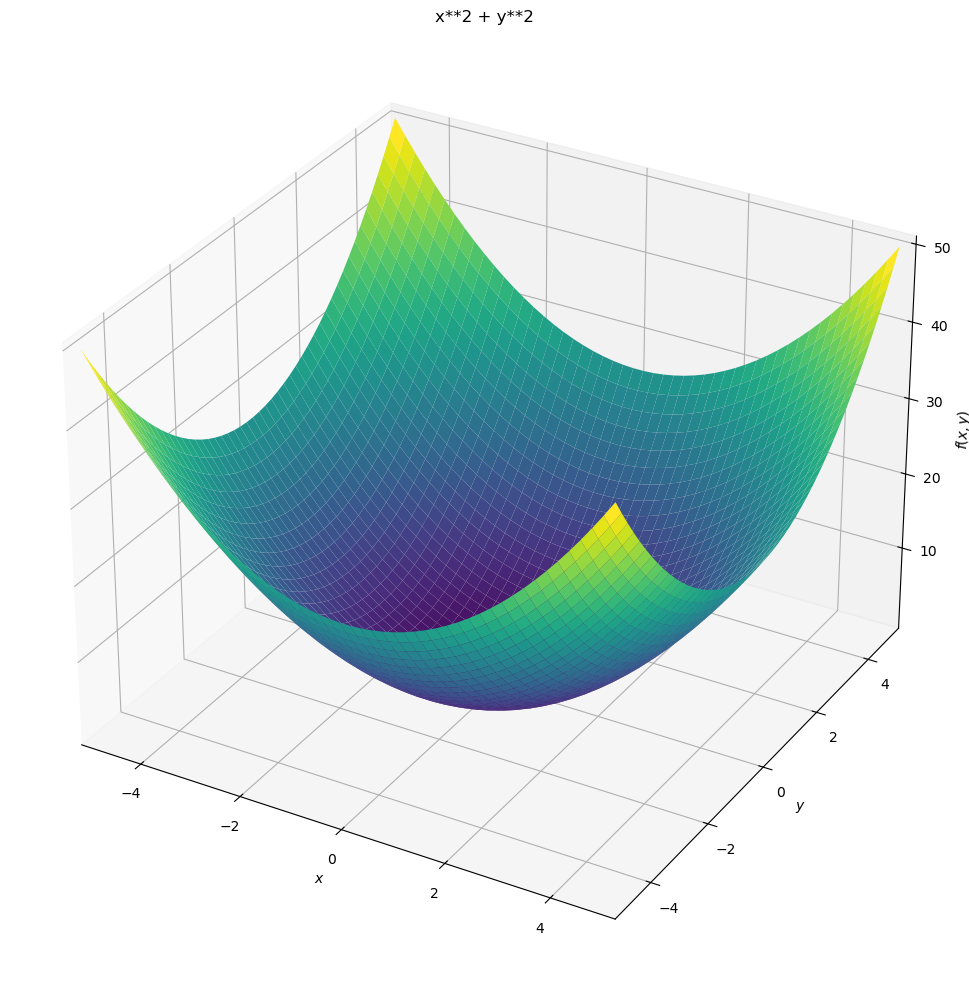

In [6]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

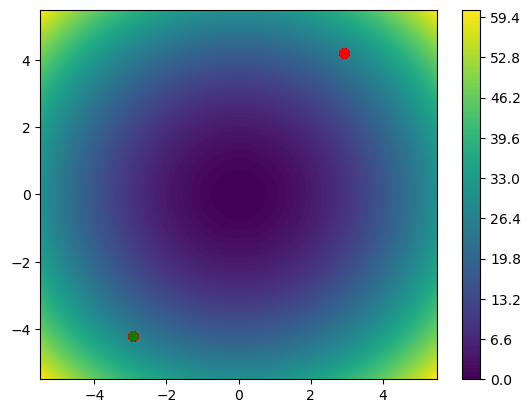

Solucion: [-2.9182692584893264, -4.224901816305877] 26.366090822468543


In [7]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
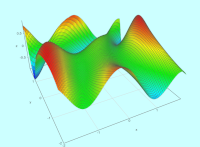


In [8]:
#Definimos la funcion
import math
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

Uso la libreria sympy para obtener la derivada de la funcion propuesta.

In [9]:
import sympy

# Defino las variables simbólicas
x, y = sympy.symbols('x y', real=True)

# Defino la función f(x, y):
funcion_compleja = sympy.sin( (1/sympy.Integer(2))*x**2 - (1/sympy.Integer(4))*y**2 + 3 ) * \
    sympy.cos( 2*x + 1 - sympy.exp(y) )

# Derivada respecto de x (parcial en x)
dfdx = sympy.diff(funcion_compleja, x)

# Derivada respecto de y, por si es necesaria
dfdy = sympy.diff(funcion_compleja, y)

# Resultados
print("f(x,y)    =", funcion_compleja)
print("df/dx     =", dfdx)
print("df/dy     =", dfdy)


f(x,y)    = sin(x**2/2 - y**2/4 + 3)*cos(2*x - exp(y) + 1)
df/dx     = x*cos(2*x - exp(y) + 1)*cos(x**2/2 - y**2/4 + 3) - 2*sin(2*x - exp(y) + 1)*sin(x**2/2 - y**2/4 + 3)
df/dy     = -y*cos(2*x - exp(y) + 1)*cos(x**2/2 - y**2/4 + 3)/2 + exp(y)*sin(2*x - exp(y) + 1)*sin(x**2/2 - y**2/4 + 3)


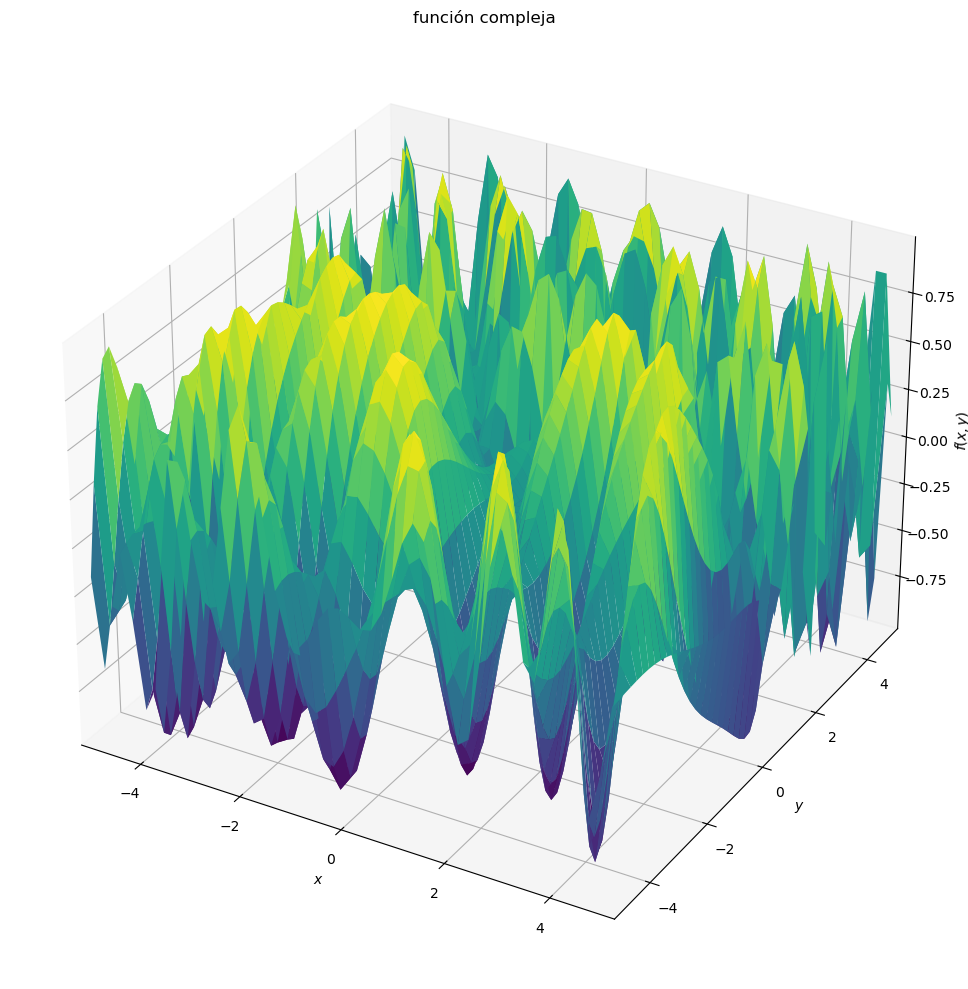

In [10]:
import sympy
from sympy.plotting import plot3d

# Variables simbólicas
x, y = sympy.symbols('x y', real=True)

# Construyo la función usando SOLO funciones de Sympy
f = sympy.sin(0.5*x**2 - 0.25*y**2 + 3) * sympy.cos(2*x + 1 - sympy.exp(y))

# Grafico en 3D la función en el rango x ∈ [-5,5], y ∈ [-5,5]
plot3d(funcion_compleja, (x, -5, 5), (y, -5, 5),
       title='función compleja',
       size=(10, 10))

Convergió en 36 iteraciones.


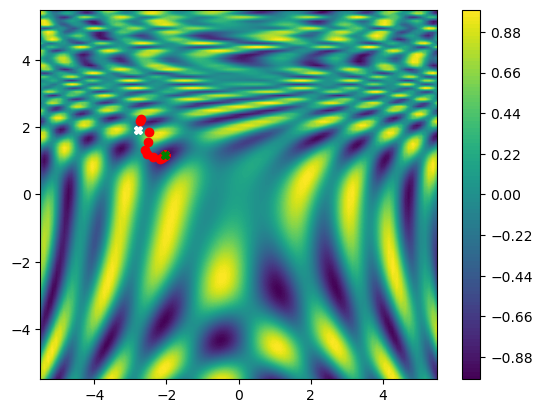

Punto Inicial: [-2.7777054399981074, 1.9247790785214738]
Solución:  [-2.02765081350455, 1.1718266838195082] -0.9999999999998768


In [15]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import random

# Definir símbolos y función en sympy
x, y = sympy.symbols('x y', real=True)
f_expr = sympy.sin(0.5*x**2 - 0.25*y**2 + 3) * sympy.cos(2*x + 1 - sympy.exp(y))
dfx_expr = sympy.diff(f_expr, x)
dfy_expr = sympy.diff(f_expr, y)

# Convertir expresiones a funciones numéricas con lambdify
f_num  = sympy.lambdify((x, y), f_expr, 'numpy')
dfx_num = sympy.lambdify((x, y), dfx_expr, 'numpy')
dfy_num = sympy.lambdify((x, y), dfy_expr, 'numpy')

# Wrappers que reciben un vector [x, y]
def f(pt):
    return f_num(pt[0], pt[1])

def grad_f(pt):
    return [dfx_num(pt[0], pt[1]), dfy_num(pt[0], pt[1])]

# Preparar datos para graficar el mapa de niveles de Z
resolucion = 100
rango = 5.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, xv in enumerate(X):
    for iy, yv in enumerate(Y):
        Z[iy, ix] = f([xv, yv])

plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Punto inicial aleatorio
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
punto_inicial = P.copy()
plt.plot(P[0], P[1], "X", c="white")

TA_inicial = 0.1  # Tasa de aprendizaje reducida
decay = 0.001  # factor de decaimiento

# Descenso de gradiente con criterio de parada simple
max_iter = 2000
tol = 1e-6  # tolerancia para el gradiente
for i in range(max_iter):
    grad = grad_f(P)
    norm_grad = np.linalg.norm(grad)
    if norm_grad < tol:
        print(f"Convergió en {i} iteraciones.")
        break
        
    # Quiero la tasa de aprendizaje dinamica, por eso la vuelvo a calcular
    TA = TA_inicial / (1 + decay * i*2)
    
    # Actualización del punto
    P[0] -= TA * grad[0]
    P[1] -= TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "X", c="green")
plt.show()
print("Punto Inicial:", punto_inicial)
print("Solución: ", P, f(P))


El minimo encontrado varia al volver a ejecutar el codigo, lo que indica que la funcion encuentra minimos locales en cada ejecucion.
El uso de una tasa de aprendizaje variable mejoro la cantidad de iteraciones necesarias para converger.